<a href="https://colab.research.google.com/github/Msanjayds/Machine_Learning_Projects/blob/master/4.%20Scikitlearn/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pipeline and Feature Selection class usage from sklearn

In [89]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

np.random.seed(0)

###########################################################################################
#Imort the Iris data
x,y = load_iris(return_X_y = True)
print('Before', x.shape)
 
#Add the Non-informative Features
x = np.hstack((x,2 * np.random.random((x.shape[0], 36))))
print('After', x.shape)
###########################################################################################

Before (150, 4)
After (150, 40)


In [92]:
###########################################################################################
# Create a pipline of the below
# a. Feature-selection transform
# b. Strandarscaler
# c. SVC estiamtor

clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto"))])
clf

Pipeline(memory=None,
         steps=[('anova',
                 SelectPercentile(percentile=10,
                                  score_func=<function chi2 at 0x7f4f64da5598>)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [107]:
###########################################################################################
## Fit the esitmator for diffrent percentile of features and capture the scores
score_means = list()
score_stds = list()
percentiles = [1,3,6,10,15,20,30,40,50,60,70,100]


for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, x, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

dict(zip(percentiles,score_means ))

##From the below we can see that withthe 10 percentile of fetures i.e 4, we can get the best score.

{1: 0.9533333333333334,
 3: 0.96,
 6: 0.9533333333333334,
 10: 0.9800000000000001,
 15: 0.9466666666666667,
 20: 0.9200000000000002,
 30: 0.8733333333333333,
 40: 0.8666666666666666,
 50: 0.8600000000000001,
 60: 0.8533333333333333,
 70: 0.8400000000000001,
 100: 0.8066666666666666}

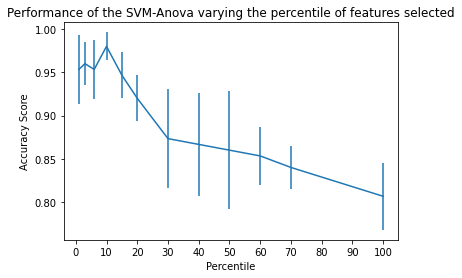

In [108]:

###########################################################################################
## Plot the cross_val score as a function of percentile of features.
plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()


